https://leetcode.com/problems/stone-game/description/  
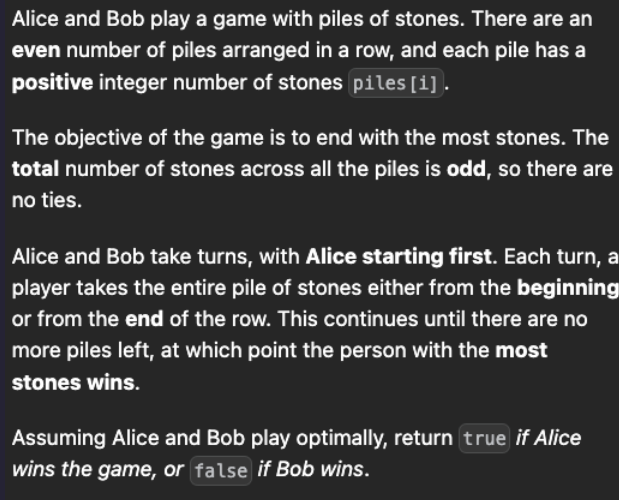

always alice will win
https://youtu.be/YVmTjwBjYwo?si=u72q6NpTnLRlwUYM

In [ ]:
//dp sol
f(0,n-1) -> this functions returns the differenece of stone held by Alice and Bob

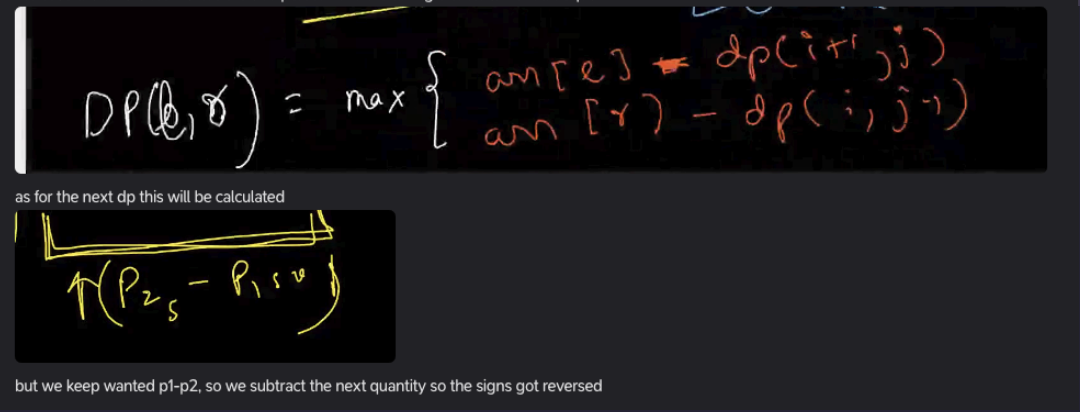

In [ ]:
class Solution {
    public:
        int f(int l, int r, vector<int>& v){
            if(l>r) return 0;
            return max(v[l]-f(l+1,r,v),v[r]-f(l,r-1,v));
        }
    
    
        bool stoneGame(vector<int>& v) {
            int n=v.size(); 
            return f(0,n-1,v)>0;
        }
    };

In [ ]:
class Solution {
public:
    bool stoneGame(vector<int>& v) {
        int n=v.size();
        //dp[i][j]
        //dp[0][n-1]
        //dp[i][j]= max(v[i]+dp[i+1][j],v[j]+dp[i][j-1])
        //dp[i][i]= v[i]
        vector<vector<int>> dp(n,vector<int>(n));
        for(int i=0;i<n;i++) dp[i][i]=v[i];
        for(int d=1;d<n;d++){
            int r=0,c=d;
            while(r<n and c<n){
                dp[r][c]= max(v[r]+dp[r+1][c],v[c]+dp[r][c-1]);
                r++;
                c++;
            }
        }
        return dp[0][n-1]>0;
    }
};

In [ ]:
//dp[i][j]= s[i]==s[j]?dp[i+1][j-1]: 1+ min(dp[i+1][j],dp[i][j-1])
dp[i][j]= 

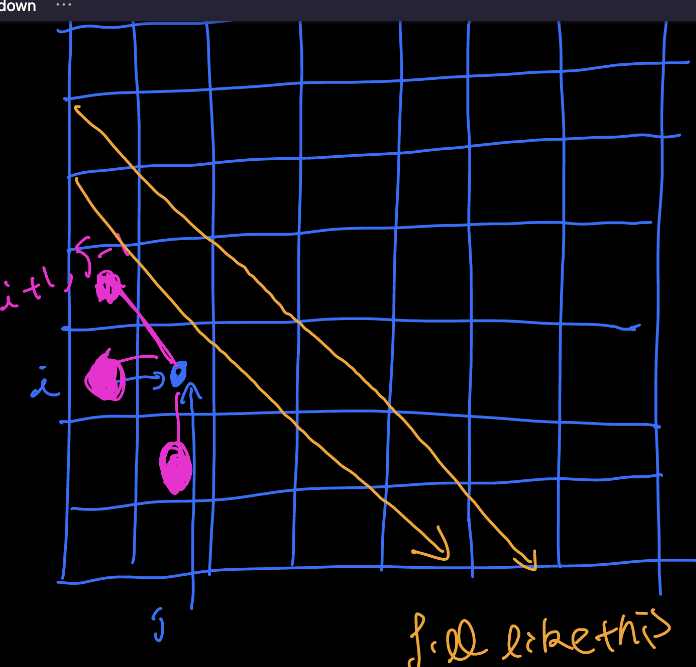

q. https://leetcode.com/problems/stone-game-vii/  
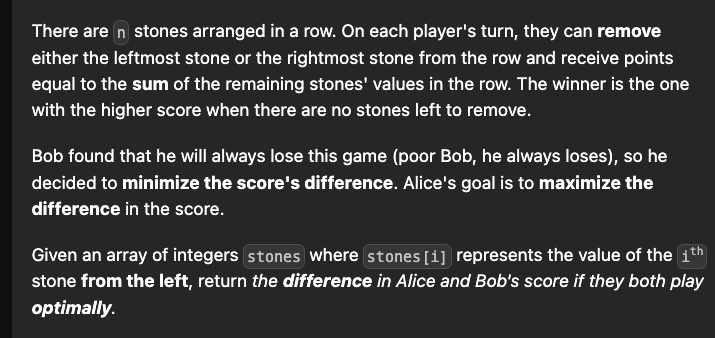

In [ ]:
class Solution {
    public:
    
        int f(int l, int r, int rem, vector<int> &v){
            if(l>r) return 0;
            return max(rem-v[l]-f(l+1,r,rem-v[l],v),rem-v[r]-f(l,r-1,rem-v[r],v));
        }
    
    
        int stoneGameVII(vector<int>& stones) {
            int sum=accumulate(stones.begin(),stones.end(),0);
            return f(0,stones.size()-1,sum,stones);
        }
    };

In [ ]:
class Solution {
    public:
    
    
        int rangeSumCalculate(vector<int>& prefixSum, int l, int r){
            int sum=prefixSum[r];
            if(l!=0) sum-=prefixSum[l-1];
            return sum;
        }
    
        int stoneGameVII(vector<int>& v) {
            int rem=accumulate(v.begin(),v.end(),0);
            int n=v.size();
            vector<vector<int>> dp(n,vector<int>(n));
            vector<int> prefixSum(n);
            prefixSum[0]=v[0];
            for(int i=1;i<n;i++) prefixSum[i]=prefixSum[i-1]+v[i];
            for(int d=1;d<n;d++){
                int r=0,c=d;
                while(r<n and c<n){
                    int rangeSum=rangeSumCalculate(prefixSum,r,c);
                    dp[r][c]= max(rangeSum-v[r]-dp[r+1][c],rangeSum-v[c]-dp[r][c-1]);
                    r++;
                    c++;
                }
            }
            return dp[0][n-1];
        }
    };